In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Round 1

In [2]:
# import the required libraries and modules that you would need.
# read that data into Python and call the dataframe churnData.
# check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
# check for null values in the dataframe. Replace the null values.
# use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
# split the data into a training set and a test set.
# scale the features either by using normalizer or a standard scaler.
# (optional)Fit a logistic Regression model on the training data.
# Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [3]:
churnData = pd.read_csv("DATA_Customer-Churn.csv")
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [4]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [5]:
# turning the "TotalCharges" column into a numerical data type
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors="coerce")

In [6]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [7]:
# for the column "TotalCharges", filling up the na's with the mean of the column
churnData["TotalCharges"] = churnData["TotalCharges"].fillna(value=churnData["TotalCharges"].mean())

In [8]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [9]:
# separating the independant variables and the target variable
X = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
y = churnData["Churn"]

In [10]:
rand_state = 34
tt_ratio = 0.3 # test/train

In [11]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tt_ratio, random_state=rand_state)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(5)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
3273,33,0,68.25,2171.15
3672,54,0,70.15,3715.65
13,49,0,103.70,5036.30
4538,3,0,85.80,272.20
5126,57,0,103.05,5925.75


In [12]:
# normalizing the independant features

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)
scaler.transform(X_train)

array([[ 0.01962802, -0.44438034,  0.11362217, -0.05497636],
       [ 0.87632657, -0.44438034,  0.17668687,  0.62707797],
       [ 0.67235073, -0.44438034,  1.29027675,  1.21027968],
       ...,
       [ 0.06042319, -0.44438034, -0.80579482, -0.42826256],
       [-0.51070918, -0.44438034,  0.79239752, -0.23590071],
       [-0.26593816, -0.44438034,  0.83886625,  0.00746616]])

In [14]:
scaler = StandardScaler()
scaler.fit(X_test)
scaler.transform(X_test)

array([[ 0.6883275 , -0.42943805, -1.47228048, -0.59750885],
       [ 1.62104822, -0.42943805,  1.66166769,  2.58056799],
       [ 0.28279676, -0.42943805, -0.35872868, -0.02374981],
       ...,
       [-0.93379547, -0.42943805, -1.15555168, -0.88529328],
       [ 1.37772977, -0.42943805,  1.314933  ,  2.04620578],
       [-0.20384013,  2.32862457,  0.19804722, -0.13710673]])

# Logistic regression model

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

,Error_metric,Train,Test
0,Accuracy,0.793712,0.779934
1,Precision,0.658072,0.625899
2,Recall,0.451886,0.457895


Confusion matrix for the train set
[[3326  305]
 [ 712  587]]


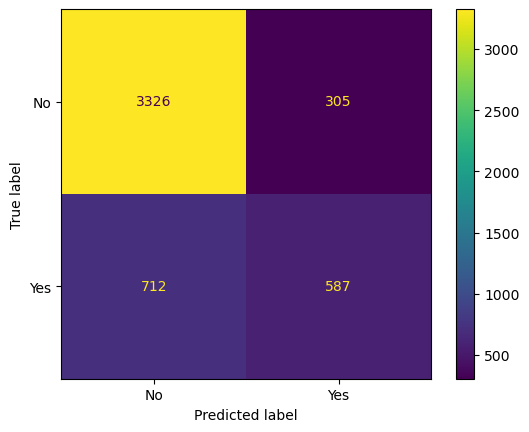



Confusion matrix for the test set
[[1387  156]
 [ 309  261]]


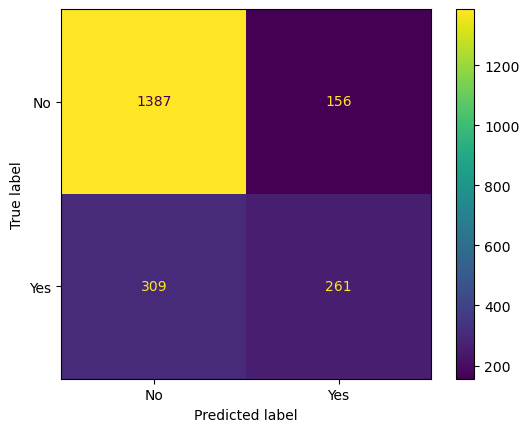

In [16]:
log_model = LogisticRegression() 

log_model.fit(X_train, y_train)

y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log, pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_log, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log, pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_log, pos_label="Yes")]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test,y_test, values_format = 'd')
plt.show()

# Using KNN classification model

In [17]:
model = KNeighborsClassifier(n_neighbors=2,weights='uniform') # KNNusing knn classification model
model.fit(X_train, y_train) # train model
y_pred = model.predict(X_test) # predict test
y_pred_train = model.predict(X_train) # predict train (for sanity checks)

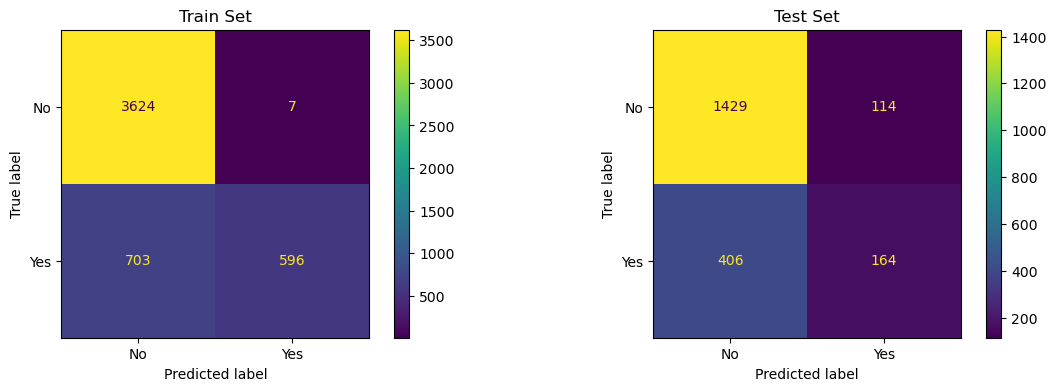

In [18]:
# showing the results
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# Round 2

In [19]:
# getting dummies
y = pd.get_dummies(churnData["Churn"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

In [21]:
model = DecisionTreeRegressor(max_depth=3)

# Not needed because I'm using a decision tree
#trans = PowerTransform(), StandardScaler()
#trans.fit(X_train)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'Predicted_value': y_pred_test})

    return performance, df_train, df_test

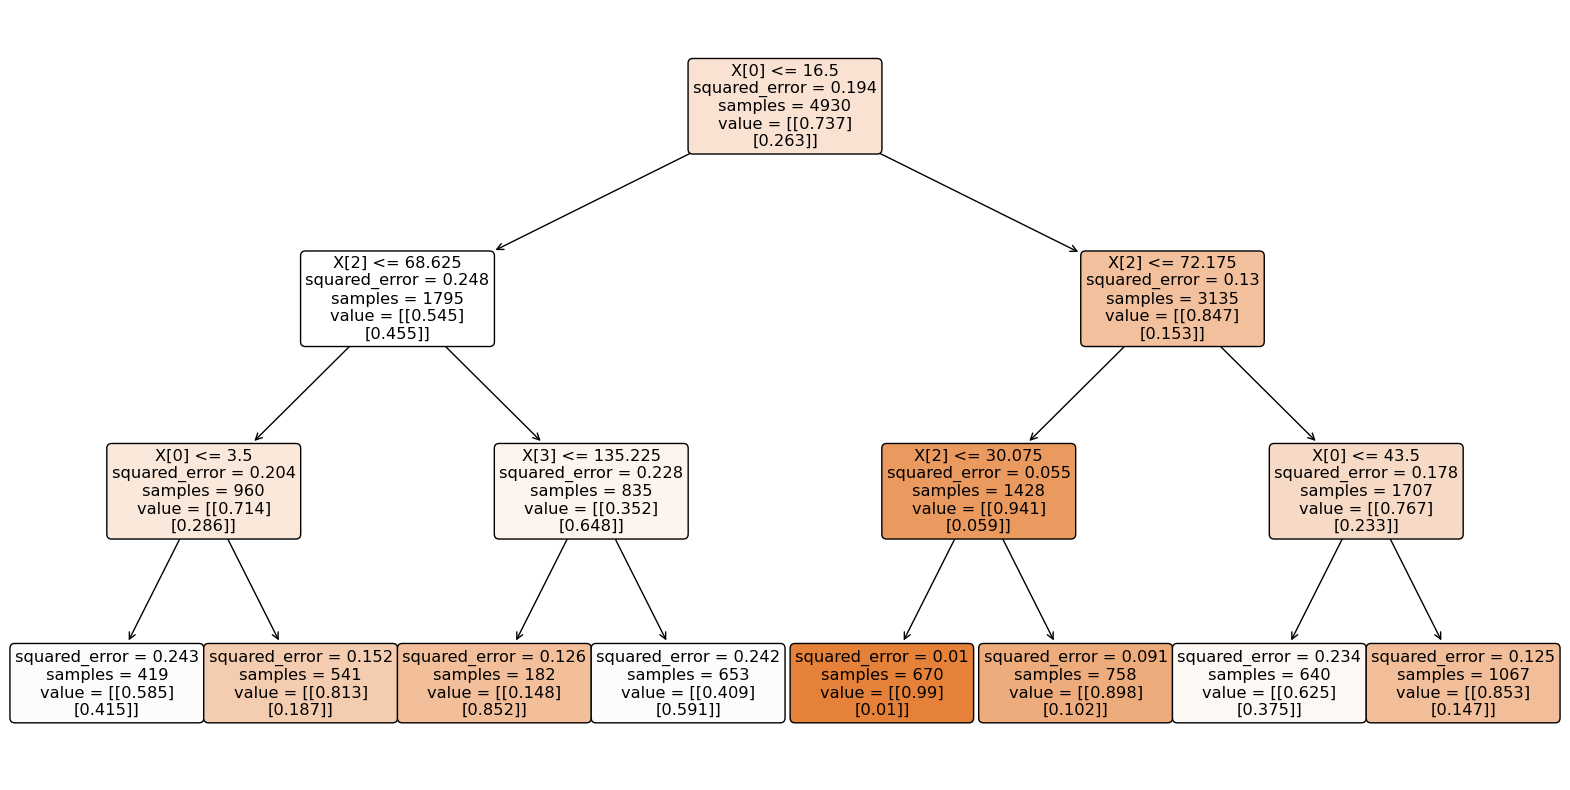

In [23]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model,filled = True, rounded=True)
plt.show()